In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [111]:
data = pd.read_csv('penguins.csv')

In [112]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [113]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [115]:
data.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

In [116]:
 data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


In [117]:
data.shape

(344, 8)

In [118]:
data.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [119]:
data=data.dropna(subset=['sex'])

In [120]:
data.isnull().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [121]:
data.shape

(333, 8)

In [122]:
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [171]:
#data['species'] = pd.Categorical(data['species'])
#data['island'] = pd.Categorical(data['island'])
#data['sex'] = pd.Categorical(data['sex'])

In [123]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [124]:
min_values = data[cols].min()
max_values = data[cols].max()

In [125]:
min_values

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64

In [126]:
max_values

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

In [127]:
#normalize data
data[cols] = (data[cols] - min_values) / (max_values - min_values)

In [128]:
X = data.drop(columns=['sex','year','species','island']) 
y = (data['sex'] == 'male').astype(int)

In [129]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111
340,0.414545,0.595238,0.508475,0.194444
341,0.636364,0.607143,0.355932,0.298611
342,0.680000,0.702381,0.644068,0.388889


In [130]:
y

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int64

In [131]:
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [172]:
X_train.shape

(266, 4)

In [173]:
X_test.shape

(67, 4)

In [174]:
y_train.shape

(266,)

In [175]:
y_test.shape

(67,)

In [132]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.loss = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, y, y_pred):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def gradient_descent(self, X, y):
        m = len(y)
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, X.shape[1])
        self.bias = 0

        for i in range(self.iterations):
            self.gradient_descent(X, y)
            y_pred = self.predict(X)
            loss = self.cost(y, y_pred)
            self.loss.append(loss)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)
    
    def plot_loss(self):
        plt.plot(range(self.iterations), self.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Over Iterations')
        plt.show()



In [149]:
model = LogisticRegression(learning_rate=1e-2, iterations=100000)

In [150]:
model.fit(X_train, y_train)

/var/folders/d2/y1p0qp0j4k5b3_vxwrsmv4jc0000gn/T/ipykernel_82058/3382021984.py:14: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [151]:
y_pred = model.predict(X_test)

In [152]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7761194029850746


In [153]:
print("Loss over iterations:")
for i, loss in enumerate(model.loss):
    print("Iteration {}: Loss = {}".format(i, loss))

Loss over iterations:
Iteration 0: Loss = inf
Iteration 1: Loss = inf
Iteration 2: Loss = inf
Iteration 3: Loss = inf
Iteration 4: Loss = inf
Iteration 5: Loss = inf
Iteration 6: Loss = inf
Iteration 7: Loss = inf
Iteration 8: Loss = inf
Iteration 9: Loss = inf
Iteration 10: Loss = inf
Iteration 11: Loss = inf
Iteration 12: Loss = inf
Iteration 13: Loss = inf
Iteration 14: Loss = inf
Iteration 15: Loss = inf
Iteration 16: Loss = inf
Iteration 17: Loss = inf
Iteration 18: Loss = inf
Iteration 19: Loss = inf
Iteration 20: Loss = inf
Iteration 21: Loss = inf
Iteration 22: Loss = inf
Iteration 23: Loss = inf
Iteration 24: Loss = inf
Iteration 25: Loss = inf
Iteration 26: Loss = inf
Iteration 27: Loss = inf
Iteration 28: Loss = inf
Iteration 29: Loss = inf
Iteration 30: Loss = inf
Iteration 31: Loss = inf
Iteration 32: Loss = inf
Iteration 33: Loss = inf
Iteration 34: Loss = inf
Iteration 35: Loss = inf
Iteration 36: Loss = inf
Iteration 37: Loss = inf
Iteration 38: Loss = inf
Iteration 39:

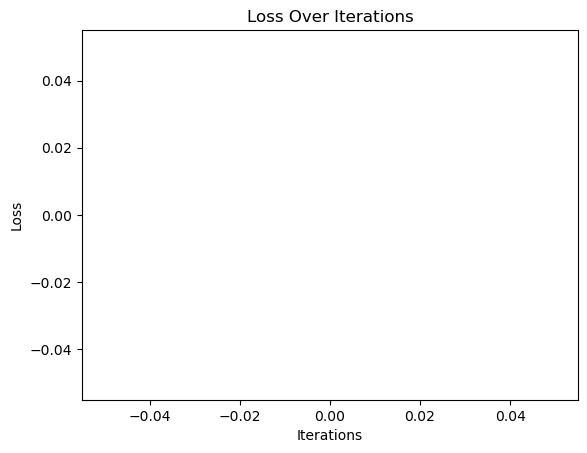

In [143]:
model.plot_loss()

In [155]:
model = LogisticRegression(learning_rate=0.2, iterations=10000)

In [156]:
model.fit(X_train, y_train)

/var/folders/d2/y1p0qp0j4k5b3_vxwrsmv4jc0000gn/T/ipykernel_82058/3382021984.py:14: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [157]:
y_pred = model.predict(X_test)

In [158]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.746268656716418


In [167]:
model = LogisticRegression(learning_rate=0.8, iterations=8000)

In [168]:
model.fit(X_train, y_train)

/var/folders/d2/y1p0qp0j4k5b3_vxwrsmv4jc0000gn/T/ipykernel_82058/3382021984.py:14: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [169]:
y_pred = model.predict(X_test)

In [170]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7313432835820896
